HALF SUBTRACTER

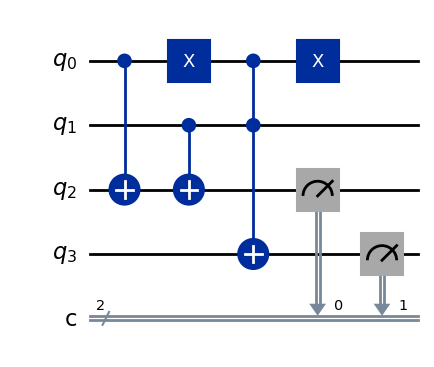

In [3]:
from qiskit import QuantumCircuit

# Create a quantum circuit with 4 qubits (A, B, Difference, Borrow)
qc = QuantumCircuit(4, 2)

# Compute DIFFERENCE = A ⊕ B using two CNOT (CX) gates
qc.cx(0, 2)  # A → Difference
qc.cx(1, 2)  # B → Difference (A ⊕ B)

# Compute BORROW = ¬A ⋅ B using NOT and Toffoli gate
qc.x(0)       # Apply NOT to A (¬A)
qc.ccx(0, 1, 3)  # (¬A, B) → Borrow (stored in qubit 3)
qc.x(0)       # Revert A back to original state (optional, for reversibility)

# Measure DIFFERENCE and BORROW
qc.measure(2, 0)  # Measure Difference
qc.measure(3, 1)  # Measure Borrow

# Draw the circuit
qc.draw('mpl')


FULL SUBTRACTER

In [1]:
def full_subtracter(a, b, bin):
    diff = (a ^ b) ^ bin  # Difference output
    borrow_out = ((not a) & b) | ((not (a ^ b)) & bin)  # Borrow output
    return diff, borrow_out

# Generate the truth table
print("A B Bin | Diff Borrow")
print("----------------------")
for a in [0, 1]:
    for b in [0, 1]:
        for bin in [0, 1]:
            d, br = full_subtracter(a, b, bin)
            print(f"{a} {b}  {bin}  |  {d}    {br}")

A B Bin | Diff Borrow
----------------------
0 0  0  |  0    0
0 0  1  |  1    1
0 1  0  |  1    1
0 1  1  |  0    1
1 0  0  |  1    0
1 0  1  |  0    0
1 1  0  |  0    0
1 1  1  |  1    1


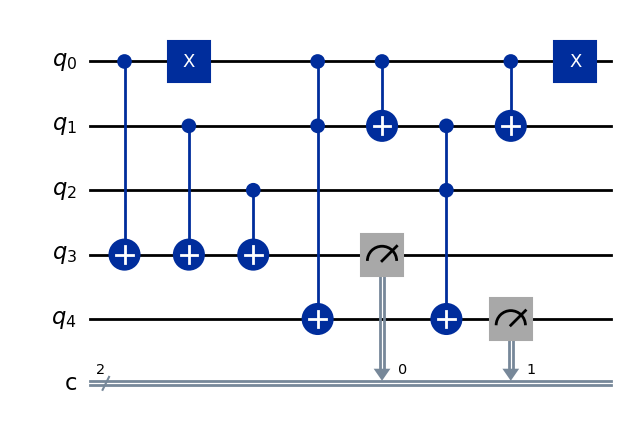

In [2]:
from qiskit import QuantumCircuit

# Create a quantum circuit with 5 qubits (A, B, Bin, Difference, Borrow Out)
qc = QuantumCircuit(5, 2)

# Compute DIFFERENCE = A ⊕ B ⊕ Bin using three CNOT (CX) gates
qc.cx(0, 3)  # A → Difference
qc.cx(1, 3)  # B → Difference
qc.cx(2, 3)  # Bin → Difference

# Compute BORROW OUT = (¬A ⋅ B) + (¬(A ⊕ B) ⋅ Bin)
# First part: Compute A' ⋅ B using NOT and Toffoli
qc.x(0)       # NOT A
qc.ccx(0, 1, 4)  # A' ⋅ B → Borrow Out

# Second part: Compute (¬(A ⊕ B) ⋅ Bin)
qc.cx(0, 1)   # A ⊕ B in q1 temporarily
qc.ccx(1, 2, 4)  # (¬(A ⊕ B) ⋅ Bin) added to Borrow Out
qc.cx(0, 1)   # Undo A ⊕ B in q1 to restore original state
qc.x(0)       # Restore A to original state

# Measure DIFFERENCE and BORROW OUT
qc.measure(3, 0)  # Measure Difference
qc.measure(4, 1)  # Measure Borrow Out

# Draw the circuit
qc.draw('mpl')
